In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
stock = pd.read_csv('./data/TSLA.csv')

In [3]:
stock = stock.iloc[:1000]
stock = stock[['close', 'time']]
stock['time'] = pd.to_datetime(stock['time'])
stock = stock.set_index('time')

In [4]:
temp = pd.read_csv('./data/temp.csv')

In [5]:
temp = temp[['date', 'meantemp']]
temp['date'] = pd.to_datetime(temp['date'])
temp = temp.set_index('date')

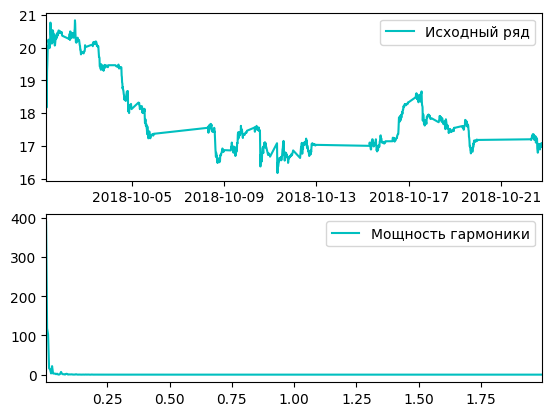

In [6]:
dt = (stock.index[1] - stock.index[0]).total_seconds() / 3600  # для получения dt в часах
n = len(stock['close'])
f_hat = np.fft.fft(stock['close']) # преобразование Фурье
PSD = f_hat * np.conj(f_hat) / n # мощность каждой гармоники
freq = (1/(0.25*n)) * np.arange(n) # создание оси частот
L = np.arange(1,np.floor(n/2),dtype='int') # только положительная часть спектра

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(stock['close'],color='c', label='Исходный ряд')
plt.xlim(stock.index[0], stock.index[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c', label='Мощность гармоники')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

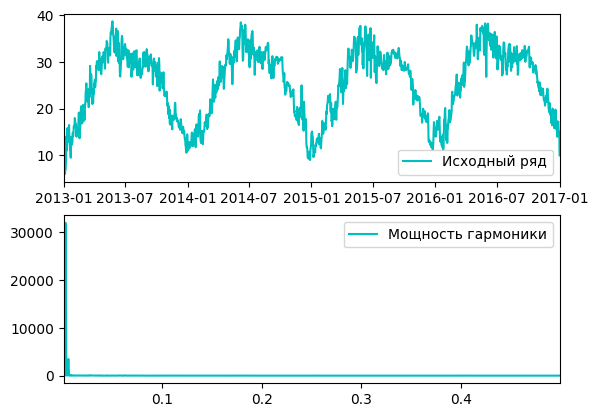

In [7]:
dt = (temp.index[1] - temp.index[0]).total_seconds() / 3600  # для получения dt в часах
n = len(temp['meantemp'])
f_hat = np.fft.fft(temp['meantemp']) # преобразование Фурье
PSD = f_hat * np.conj(f_hat) / n # мощность каждой гармоники
freq = (1/(n)) * np.arange(n) # создание оси частот
L = np.arange(1,np.floor(n/2),dtype='int') # только положительная часть спектра

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(temp['meantemp'],color='c', label='Исходный ряд')
plt.xlim(temp.index[0], temp.index[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c', label='Мощность гармоники')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

In [14]:
from pymssa import MSSA

mssa = MSSA(n_components=9,
            window_size=12,
            verbose=True)
x=stock['close']
mssa.fit(x)
z=np.zeros(len(x))
fig=plt.figure(figsize=(18, 13), facecolor='w')
for comp in range(9):
    if comp%2:
        continue
    ax = plt.subplot(5,1,comp//2+1)
    ax.plot(x.index, x.values, lw=2, alpha=0.2,  label='initial series')
    y=mssa.components_[0, :, comp]
    z=z+y
    ax.plot(x.index, y, lw=2, alpha=0.8, label='component={}'.format(comp))
    ax.plot(x.index, z, lw=2, alpha=0.5, label='Sum of components')
    ax.legend(loc='best')

ModuleNotFoundError: No module named 'pymssa'